In [1]:
import pandas as pd


In [2]:
# using klib library to perform data cleaning . Removes columns which has all empty values or one values and 
  #convert data types to proper format
pip install klib

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Loading the loan.csv file into a dataframe
df = pd.read_csv('/Users/razatranjan/Documents/DataScience/Case_Study_LendingLoans/loan.csv', index_col = "id")

/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_86628/2000907401.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/razatranjan/Documents/DataScience/Case_Study_LendingLoans/loan.csv', index_col = "id")


In [ ]:
############ DATA CLEANING AND REFINING ###############

In [4]:
import klib

In [13]:
# Performing cleaning
df_clean = klib.data_cleaning(df)

Shape of cleaned data: (39717, 48) - Remaining NAs: 43138


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 62
     of which 6 single valued.     Columns: ['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt']
Dropped missing values: 2220226
Reduced memory by at least: 27.66 MB (-79.85%)



In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   member_id                   39717 non-null  int32   
 1   loan_amnt                   39717 non-null  int32   
 2   funded_amnt                 39717 non-null  int32   
 3   funded_amnt_inv             39717 non-null  float64 
 4   term                        39717 non-null  category
 5   int_rate                    39717 non-null  category
 6   installment                 39717 non-null  float32 
 7   grade                       39717 non-null  category
 8   sub_grade                   39717 non-null  category
 9   emp_title                   37258 non-null  string  
 10  emp_length                  38642 non-null  category
 11  home_ownership              39717 non-null  category
 12  annual_inc                  39717 non-null  float64 
 13  verification_sta

In [34]:
# Cleaning the data and refining some columns values to proper values
df['int_rate'] = df['int_rate'].apply(lambda x: x.replace("%", ""))

df['revol_util'] = df['revol_util'].str.replace("%", "")
df['zip_code'] = df['zip_code'].str.replace("x", "")
df['zip_code_3_chars'] = df['zip_code']
df.drop(['zip_code'], axis=1, inplace = True)


df['emp_length'] = df['emp_length'].str.replace("years", "")
df['emp_length'] = df['emp_length'].str.replace("year", "")
df['emp_length'] = df['emp_length'].str.replace(" ", "")

In [19]:
def find_experience(exp):
    exp_cat = "NA"
    try:
        exp = int(exp)
        if exp >=1 and exp <3:
            exp_cat = "Junior"
        elif exp>=3 and exp<6:
            exp_cat = "Mid"
        elif exp>=6 and exp<=10:
            exp_cat = "High"
    except Exception as e:
        if exp == "10+":
            exp_cat = "Very High"
        elif exp == "<1":
            exp_cat = "Fresher";
    return exp_cat

In [42]:
df['emp_length'] = df['emp_length'].apply(lambda x: find_experience(x))


In [43]:
df['experience'] = df['emp_length']
df.drop(['emp_length'], axis=1, inplace = True)

In [44]:
df = df_clean
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   member_id                39717 non-null  int32   
 1   loan_amnt                39717 non-null  int32   
 2   funded_amnt              39717 non-null  int32   
 3   funded_amnt_inv          39717 non-null  float64 
 4   term                     39717 non-null  category
 5   int_rate                 39717 non-null  float32 
 6   installment              39717 non-null  float32 
 7   grade                    39717 non-null  category
 8   sub_grade                39717 non-null  category
 9   home_ownership           39717 non-null  category
 10  annual_inc               39717 non-null  float64 
 11  verification_status      39717 non-null  category
 12  issue_d                  39717 non-null  category
 13  loan_status              39717 non-null  category
 14  purpos

In [23]:
# We can drop columns like emp_title , url , desc as these attributes are relations with loans for charged off

# We can drop tax_liens , chargeoff_within_12_mths ,  collections_12_mths_ex_med as these contains only 0 , NA and Blank values

df.drop(['emp_title', 'desc', 'url', 'tax_liens', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med'], axis=1, inplace = True)



In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   member_id                39717 non-null  int32   
 1   loan_amnt                39717 non-null  int32   
 2   funded_amnt              39717 non-null  int32   
 3   funded_amnt_inv          39717 non-null  float64 
 4   term                     39717 non-null  category
 5   int_rate                 39717 non-null  category
 6   installment              39717 non-null  float32 
 7   grade                    39717 non-null  category
 8   sub_grade                39717 non-null  category
 9   emp_length               38642 non-null  category
 10  home_ownership           39717 non-null  category
 11  annual_inc               39717 non-null  float64 
 12  verification_status      39717 non-null  category
 13  issue_d                  39717 non-null  category
 14  loan_s

In [26]:
# Custom method to convert date type in format such as'AUG-03' to a valid dtype: datetime64[ns] '2003-08-01'

def get_valid_dates(d):
    try:
        d_year = int(d[d.index("-")+1:])
        current_year = pd.Timestamp.today().year%100

        if d_year > current_year :
            year = "19"+ str(d[d.index("-")+1:])
        else:
            year = "20"+ str(d[d.index("-")+1:])
    
        d = d[:d.index("-")+1:] + str(year)
    except Exception as e :
        return d;
    return d;

In [ ]:
# Convert earliest_cr_line, issue_d, last_pymnt_d and last_credit_pull_d to standard date datetime64 format .

df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: get_valid_dates(x))
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'] ,format='%b-%Y')


df['issue_d'] = df['issue_d'].apply(lambda x: get_valid_dates(x))
df['issue_d'] = pd.to_datetime(df['issue_d'] ,format='%b-%Y')

df['last_pymnt_d'] = df['last_pymnt_d'].apply(lambda x: get_valid_dates(x))
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'] ,format='%b-%Y')

df['last_credit_pull_d'] = df['last_credit_pull_d'].apply(lambda x: get_valid_dates(x))
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'] ,format='%b-%Y')

In [92]:
# Converting some columns data types tom proper values as per the business needs and requirements

df['issue_d'] = df['issue_d'].astype('datetime64[ns]')
df['earliest_cr_line'] = df['earliest_cr_line'].astype('datetime64[ns]')
df['last_pymnt_d'] = df['last_pymnt_d'].astype('datetime64[ns]')
df['last_credit_pull_d'] = df['last_credit_pull_d'].astype('datetime64[ns]')

In [45]:
df['int_rate'] = df['int_rate'].astype('float32')
df['experience'] = df['experience'].astype('category')
df['zip_code_3_chars'] = df['zip_code_3_chars'].astype('category')

In [46]:
# Now creating a new csv with proper refined
df.to_csv('loan_cleaned.csv')

In [95]:
#Group by Loan Status and then getting only Charged off group datas and assigned to charged_off_loans dataframe

charged_off_loans = df.groupby('loan_status').get_group('Charged Off')

In [96]:
charged_off_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5627 entries, 1 to 39688
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   member_id                5627 non-null   int32         
 1   loan_amnt                5627 non-null   int32         
 2   funded_amnt              5627 non-null   int32         
 3   funded_amnt_inv          5627 non-null   float64       
 4   term                     5627 non-null   category      
 5   int_rate                 5627 non-null   float32       
 6   installment              5627 non-null   float32       
 7   grade                    5627 non-null   category      
 8   sub_grade                5627 non-null   category      
 9   home_ownership           5627 non-null   category      
 10  annual_inc               5627 non-null   float64       
 11  verification_status      5627 non-null   category      
 12  issue_d                  5627 non

In [ ]:
#######################################     DATA ANALYSIS    ########################################

<Axes: xlabel='Grades', ylabel='Loan Charged Off %'>

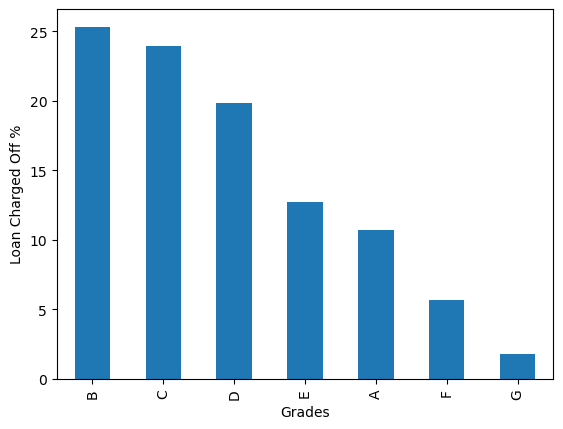

In [49]:
# Grades 
grade_counts = charged_off_loans['grade'].value_counts(normalize=True)*100
grade_counts.plot(kind='bar', xlabel='Grades', ylabel='Loan Charged Off %')

# Inferences :
# Grade B , C and D are doing max charged off . 

<Axes: xlabel='SubGrades', ylabel='Loan Charged Off %'>

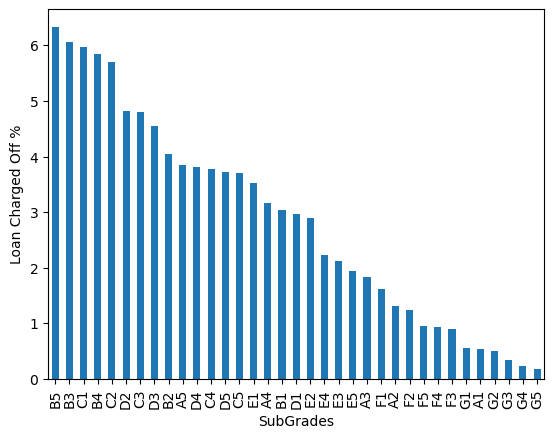

In [50]:
# Sub Grades
sub_grade_counts = charged_off_loans['sub_grade'].value_counts(normalize=True)*100

sub_grade_counts.plot(kind='bar', xlabel='SubGrades', ylabel='Loan Charged Off %')

# Inferences :
# In Grade B , Subgrade B5 and B3 are doing more charged off

<Axes: xlabel='Term', ylabel='charged off %'>

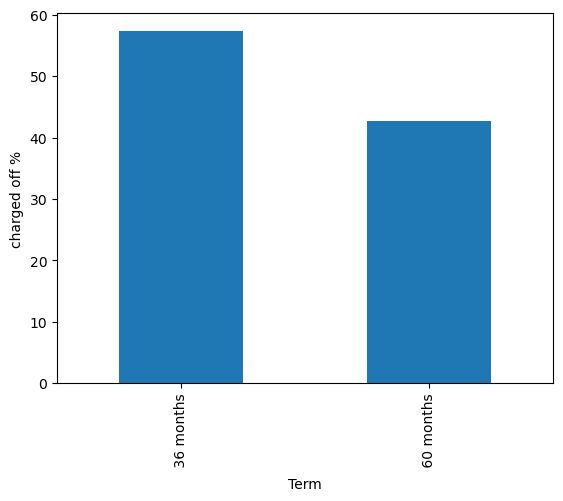

In [52]:
 # Term
term_counts = charged_off_loans['term'].value_counts(normalize=True)*100
term_counts.plot(kind='bar', xlabel='Term', ylabel='charged off %')

# Inferences :
# People who took loan for 36 months are doing more defaults

<Axes: xlabel='home_ownership', ylabel='charged off %'>

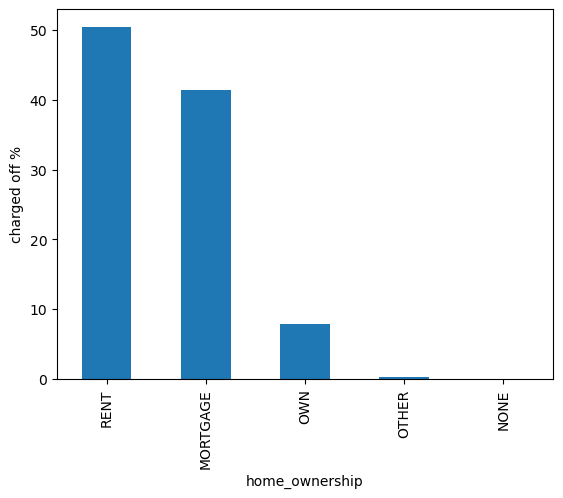

In [53]:
# Home Ownership

home_ownership_counts = charged_off_loans['home_ownership'].value_counts(normalize=True)*100
home_ownership_counts.plot(kind='bar', xlabel='home_ownership', ylabel='charged off %')

# Inferences :
#People who are staying at rent and in mortgage are very high likely for charged off

<Axes: xlabel='purpose', ylabel='Charged off %'>

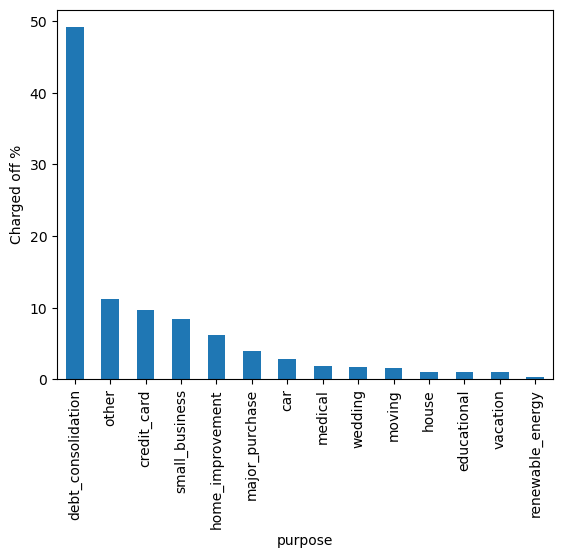

In [54]:
# Purpose

purpose_counts = charged_off_loans['purpose'].value_counts(normalize=True)*100
purpose_counts.plot(kind='bar', xlabel='purpose', ylabel='Charged off %')

# Inferences :
#Someone with having purpose for taking loan as debt_consolidation are more likely for charged off  as  percentage is 50%.


<Axes: xlabel='verification_status', ylabel='Charged off %'>

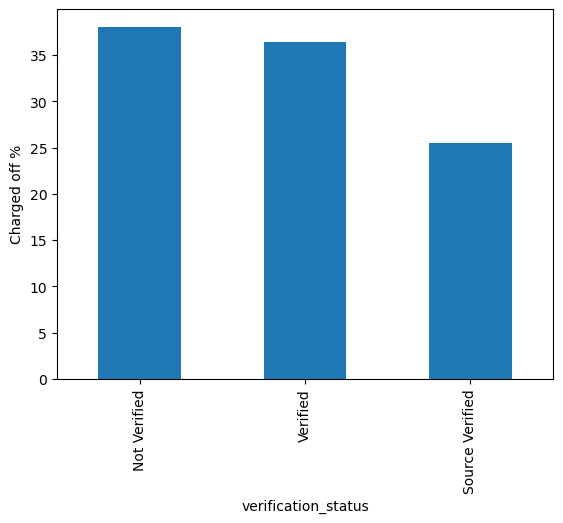

In [55]:
# Verification Status

verification_status_counts = charged_off_loans['verification_status'].value_counts(normalize=True)*100
verification_status_counts.plot(kind='bar', xlabel='verification_status', ylabel='Charged off %')

# Inferences :
# Persons with having not verified and verified have almost same percentage of charged off but not verified are still more 
# So , Better to be verified and source verified



<Axes: xlabel='addr_state', ylabel='Charged off %'>

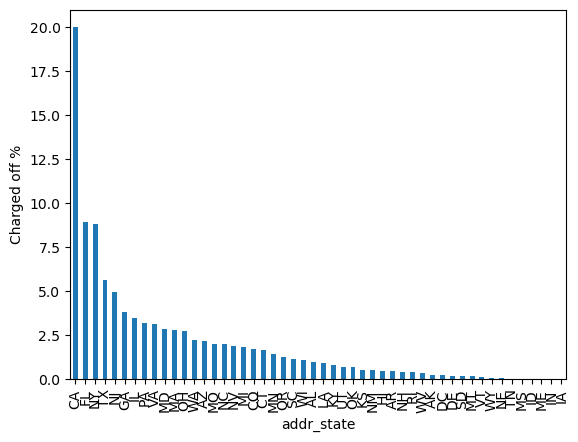

In [56]:
# Address State

addr_state_counts = charged_off_loans['addr_state'].value_counts(normalize=True)*100
addr_state_counts.plot(kind='bar', xlabel='addr_state', ylabel='Charged off %')

# Inferences :
#Address State CA are having more chances of defaulters

In [57]:
#Installments

charged_off_loans['installment'].describe()

count    5627.000000
mean      336.175018
std       217.051605
min        22.790001
25%       168.555000
50%       293.869995
75%       457.840012
max      1305.189941
Name: installment, dtype: float64

<Axes: title={'center': 'installment'}, xlabel='loan_status'>

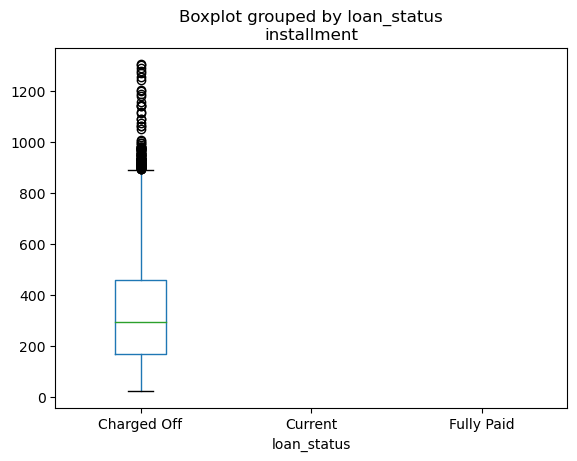

In [125]:
charged_off_loans.boxplot(by ='loan_status', column =['installment'], grid = False) 

In [58]:
# handling the outliers
Q1 = charged_off_loans['installment'].quantile(0.25)
Q3 = charged_off_loans['installment'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(lower)
print(upper)

-265.3725166320801
891.7675285339355


/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_86628/1765265699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['installment_range'] = pd.cut(x=charged_off_loans['installment'], bins=range(0, 1200, 200))


<Axes: xlabel='Installments', ylabel='Loan Charged Off %'>

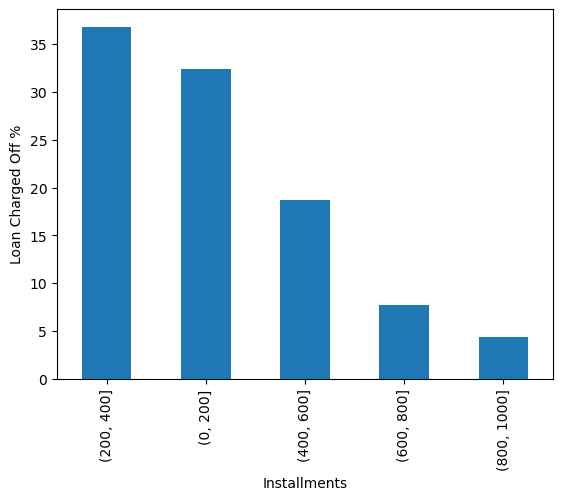

In [59]:
charged_off_loans['installment_range'] = pd.cut(x=charged_off_loans['installment'], bins=range(0, 1200, 200))

installment_range_freq = charged_off_loans['installment_range'].value_counts(normalize=True)*100


installment_range_freq.plot(kind='bar', xlabel='Installments', ylabel='Loan Charged Off %')

# Inferences :
# people paying lower installments are doing more charged off . i.e in range 0-400 installments , default is more.

In [60]:
# Int_rates

charged_off_loans['int_rate'].describe()

count    5627.000000
mean       13.820432
std         3.654426
min         5.420000
25%        11.310000
50%        13.610000
75%        16.400000
max        24.400000
Name: int_rate, dtype: float64

<Axes: title={'center': 'int_rate'}, xlabel='loan_status'>

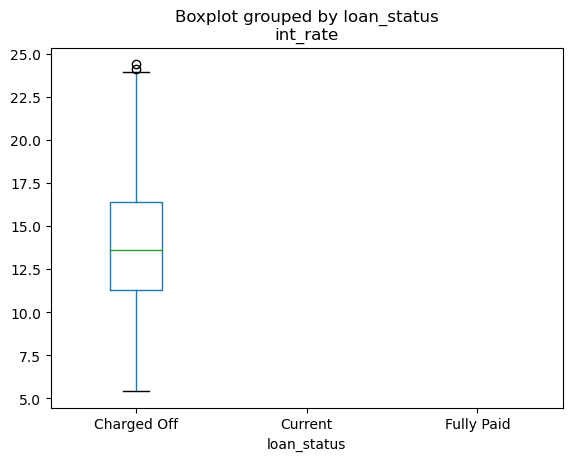

In [124]:
charged_off_loans.boxplot(by ='loan_status', column =['int_rate'], grid = False) 

In [61]:
# handling the outliers
Q1 = charged_off_loans['int_rate'].quantile(0.25)
Q3 = charged_off_loans['int_rate'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(lower)
print(upper)

# lower is 3 so bot much lower outliers
# upper is equal to max so we can consider no higher outliers

3.6750004291534424
24.034999132156372


/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_86628/3451642597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['int_rate_range'] = pd.cut(x=charged_off_loans['int_rate'], bins=range(0, 30, 3))


<Axes: xlabel='Interest Rate', ylabel='Loan Charged Off %'>

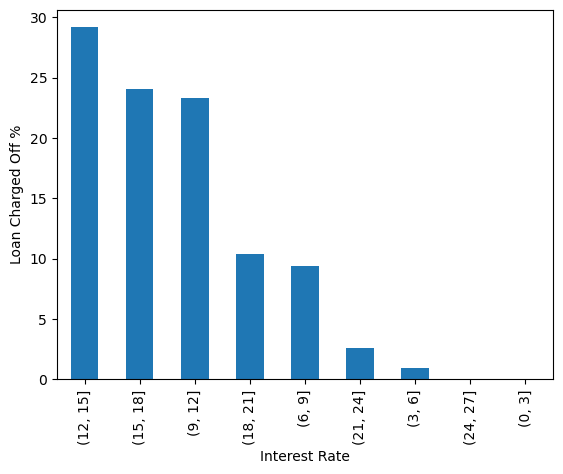

In [62]:
charged_off_loans['int_rate_range'] = pd.cut(x=charged_off_loans['int_rate'], bins=range(0, 30, 3))

int_rate_range_freq = charged_off_loans['int_rate_range'].value_counts(normalize=True)*100


int_rate_range_freq.plot(kind='bar', xlabel='Interest Rate', ylabel='Loan Charged Off 
          
# Inferences :                       
# Mid Range of (9,18) has more charged off . No proper inferences from this

<Axes: xlabel='zip_code_3_chars', ylabel='Charged Off %'>

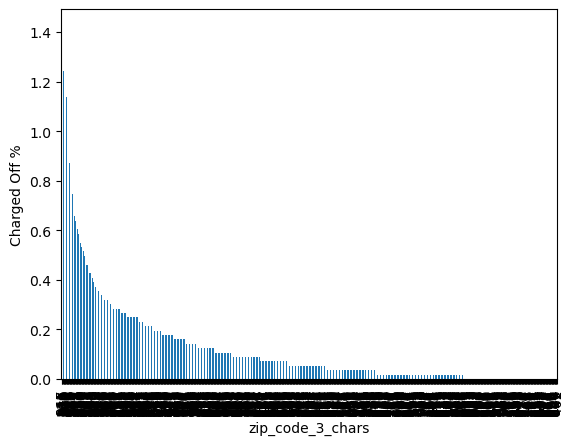

In [64]:
# Zip Code
zip_code_3_chars_counts = charged_off_loans['zip_code_3_chars'].value_counts(normalize=True)*100
zip_code_3_chars_counts.plot(kind='bar', xlabel='zip_code_3_chars', ylabel='Charged Off %')

# Inferences :
#Zip_code doesn't have an significant impact on charged off

<Axes: xlabel='experience level', ylabel='Charged off %'>

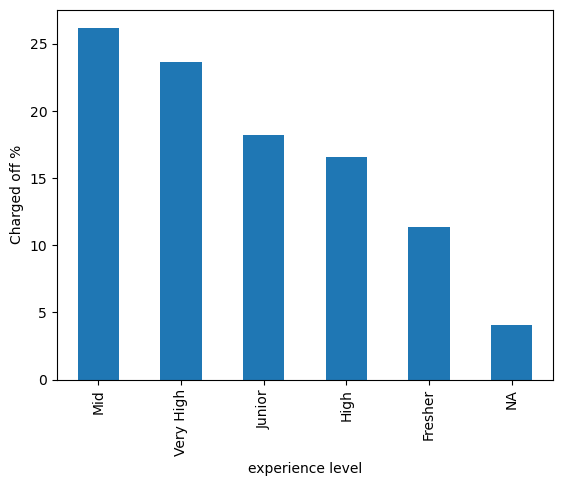

In [65]:
# Experience

experience_counts = charged_off_loans['experience'].value_counts(normalize=True)*100
experience_counts.plot(kind='bar', xlabel='experience level', ylabel='Charged off %')

# Inferences :
#Mid level experience and high level experience are doing more defaults than rest.
#Mid level experienced people are doing charged off max i.e someone having experience 3 and 6 years

/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_86628/1302033194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['issue_date_year'] = charged_off_loans['issue_d'].dt.year


<Axes: xlabel='issue_date year', ylabel='Charged Off %'>

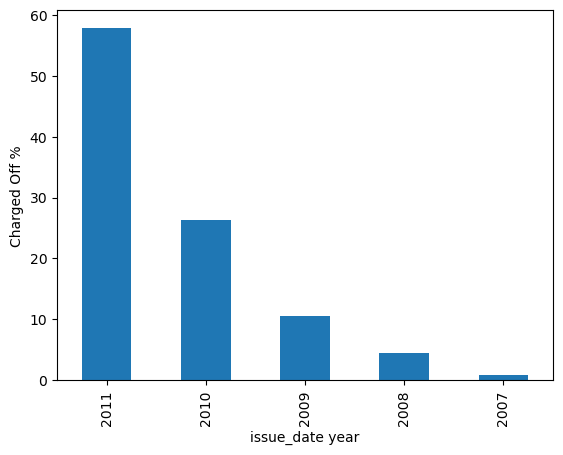

In [66]:
# Issue Date

charged_off_loans['issue_date_year'] = charged_off_loans['issue_d'].dt.year
charged_off_loans['issue_date_year']

issue_date_year_counts = charged_off_loans['issue_date_year'].value_counts(normalize=True)*100
issue_date_year_counts.plot(kind='bar', xlabel='issue_date year', ylabel='Charged Off %')

# Inferences :
# 2011 Loans issued got more charged off but from here we couldn't find any patters for the future requests for 
#loan candidates

/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_86628/1805382827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['issue_date_month'] = charged_off_loans['issue_d'].dt.month


<Axes: xlabel='issue_date month', ylabel='Charged Off %'>

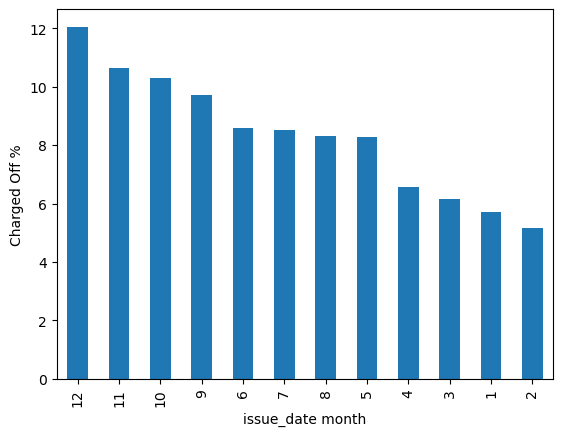

In [67]:
charged_off_loans['issue_date_month'] = charged_off_loans['issue_d'].dt.month
charged_off_loans['issue_date_month']

issue_date_month_counts = charged_off_loans['issue_date_month'].value_counts(normalize=True)*100
issue_date_month_counts.plot(kind='bar', xlabel='issue_date month', ylabel='Charged Off %')

# Inferences :
#From this plot we can observe that loans which got issued during end of the year i.e Quarter 4 got more charged off .


<Axes: xlabel='delinq_2yrs', ylabel='Charged Off %'>

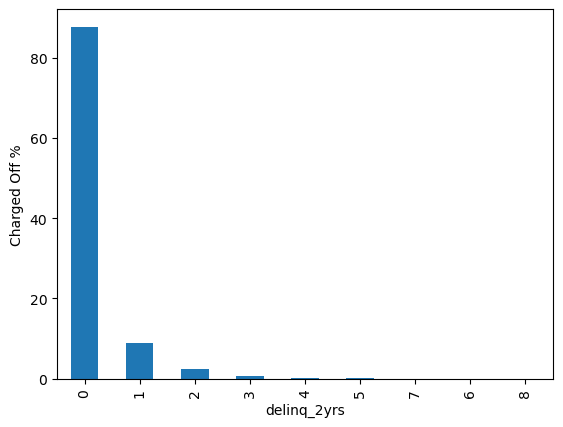

In [68]:
# Deling 2 years
delinq_2yrs_counts = charged_off_loans['delinq_2yrs'].value_counts(normalize=True)*100
delinq_2yrs_counts.plot(kind='bar', xlabel='delinq_2yrs', ylabel='Charged Off %')

# Inferences :
# People who have 0 delinquency for 2 years did more charged off .

In [69]:
# Loan Amount

charged_off_loans['loan_amnt'].describe()

# Difference between 75% and 25% loan_amount gives sense of spread of data 
#i.e 10900 and 10000 is median . Approx 10000 is the amount people took loan and charged off. 

count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<Axes: title={'center': 'loan_amnt'}, xlabel='loan_status'>

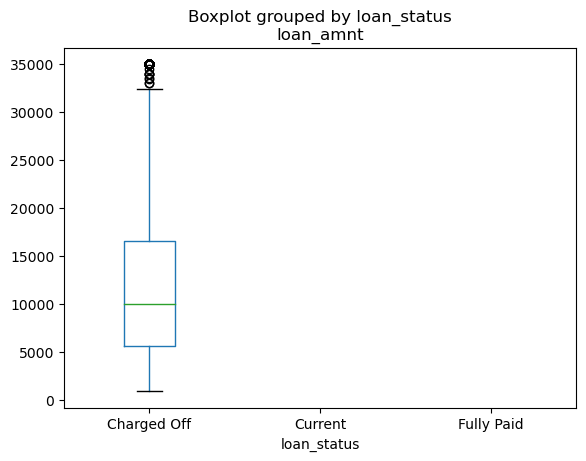

In [123]:
charged_off_loans.boxplot(by ='loan_status', column =['loan_amnt'], grid = False) 

<Axes: ylabel='Frequency'>

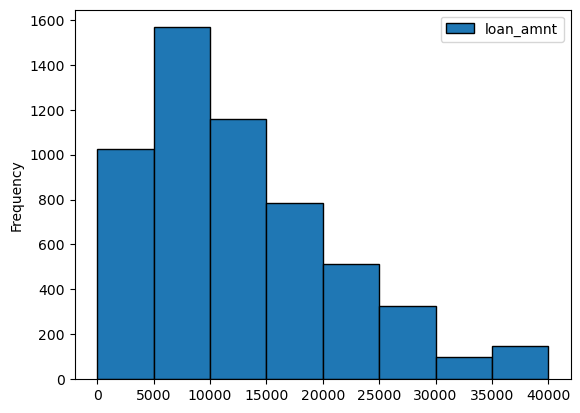

In [70]:
charged_off_loans.plot.hist(column=['loan_amnt'], edgecolor='black', bins=[0,5000,10000, 15000, 20000, 25000, 30000, 35000,40000])



In [71]:
# From Histogram also we can see in range of 5000-1000 max people who took loan charged off .

charged_off_loans['loan_amount_range'] = pd.cut(x=charged_off_loans['loan_amnt'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000])

charged_off_loans['loan_amount_range']




/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_86628/1200734749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['loan_amount_range'] = pd.cut(x=charged_off_loans['loan_amnt'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000])


1             (0, 5000]
8         (5000, 10000]
9         (5000, 10000]
12        (5000, 10000]
14        (5000, 10000]
              ...      
39667         (0, 5000]
39668         (0, 5000]
39669     (5000, 10000]
39678         (0, 5000]
39688    (15000, 20000]
Name: loan_amount_range, Length: 5627, dtype: category
Categories (8, interval[int64, right]): [(0, 5000] < (5000, 10000] < (10000, 15000] < (15000, 20000] < (20000, 25000] < (25000, 30000] < (30000, 35000] < (35000, 40000]]

<Axes: xlabel='Loan Amount', ylabel='Loan Charged Off %'>

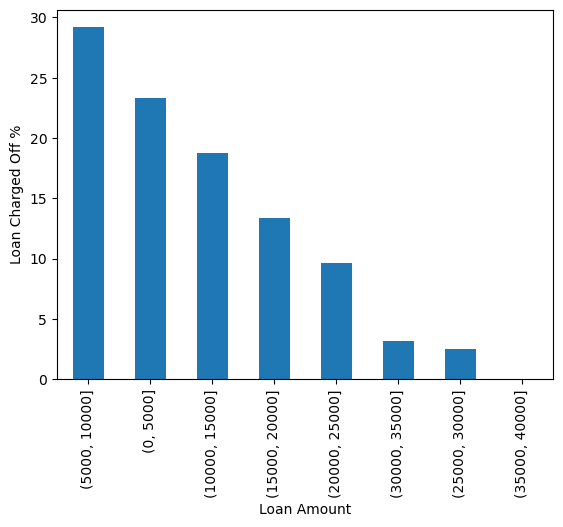

In [72]:

loan_amount_ranges_freq = charged_off_loans['loan_amount_range'].value_counts(normalize=True)*100
loan_amount_ranges_freq.plot(kind='bar', xlabel='Loan Amount', ylabel='Loan Charged Off %')

# Inferences :
# people taking loans of amount in range 5000-10000 did more charged off .

<Axes: xlabel='inq_last_6mths', ylabel='Loan Charged Off %'>

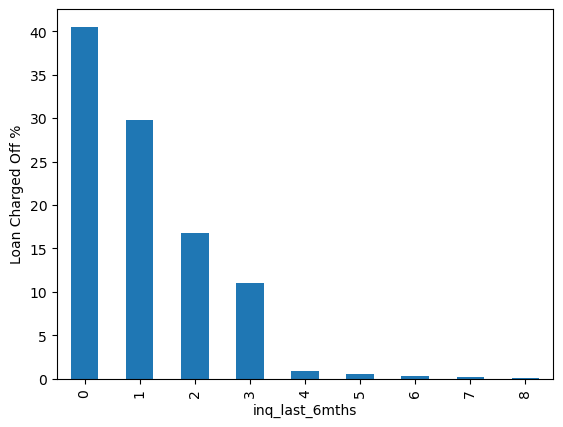

In [73]:
# inquires in last 6 months

inq_last_6mths_counts = charged_off_loans['inq_last_6mths'].value_counts(normalize=True)*100
inq_last_6mths_counts.plot(kind='bar', xlabel='inq_last_6mths', ylabel='Loan Charged Off %')

# Inferences :
# People who doesn't enquire in last 6 months have chargedoff around 90%

In [74]:
#Annual Income

charged_off_loans['annual_inc'].describe()

count    5.627000e+03
mean     6.242730e+04
std      4.777601e+04
min      4.080000e+03
25%      3.700000e+04
50%      5.300000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64

<Axes: title={'center': 'annual_inc'}, xlabel='loan_status'>

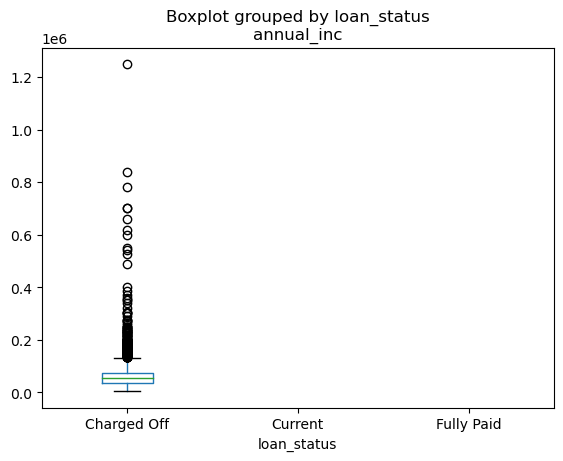

In [122]:
charged_off_loans.boxplot(by ='loan_status', column =['annual_inc'], grid = False) 

In [76]:
# handling the outliers
Q1 = charged_off_loans['annual_inc'].quantile(0.25)
Q3 = charged_off_loans['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(lower)
print(upper)

-20000.0
132000.0


/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_86628/1045514227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['annual_inc_range'] = pd.cut(x=charged_off_loans['annual_inc'], bins=range(0, 150000, 30000))


<Axes: xlabel='Annual Income Range', ylabel='Loan Charged Off %'>

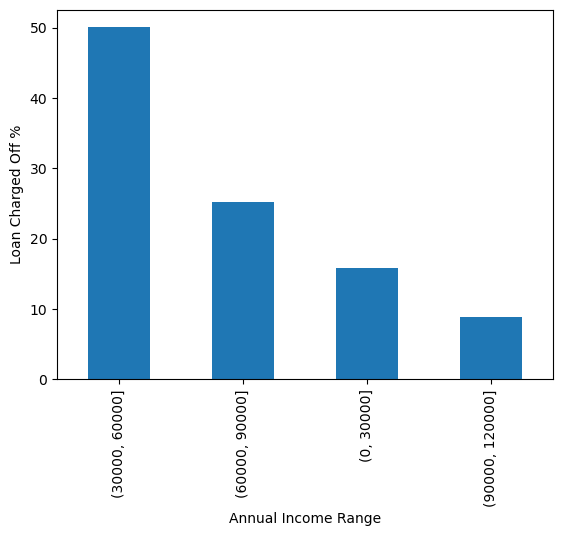

In [77]:
charged_off_loans['annual_inc_range'] = pd.cut(x=charged_off_loans['annual_inc'], bins=range(0, 150000, 30000))

charged_off_loans[['annual_inc','annual_inc_range']]

annual_income_ranges_freq = charged_off_loans['annual_inc_range'].value_counts(normalize=True)*100
annual_income_ranges_freq.plot(kind='bar', xlabel='Annual Income Range', ylabel='Loan Charged Off %')


# Inferences :
# We can analyze that people in range of 30-60k are doing 50% charged off . Or We can say annual income below 50k are doing 70% charged off .
#So, Annual Income is an important paramter for the charged off .



<Axes: xlabel='Public Records', ylabel='Loan Charged Off %'>

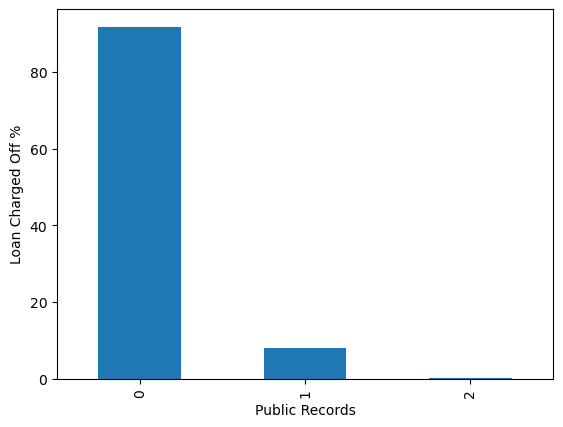

In [78]:
# Pub_rec

pub_rec_counts = charged_off_loans['pub_rec'].value_counts(normalize=True)*100
pub_rec_counts.plot(kind='bar', xlabel='Public Records', ylabel='Loan Charged Off %')

# Inferences :
# One who doesn't have derogatory public records are doing > 90% charged off

Text(0, 0.5, 'Charged Off')

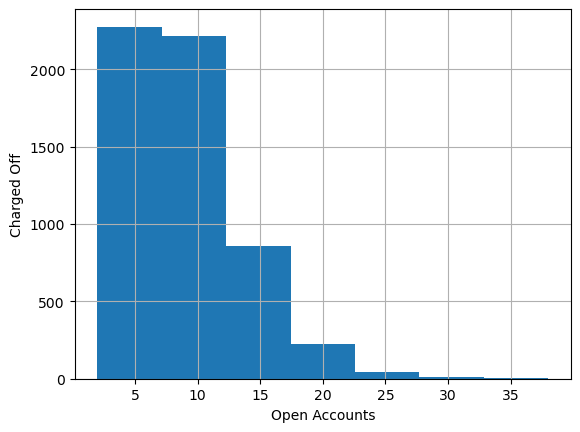

In [79]:
#Open Accounts

plt = charged_off_loans['open_acc'].hist(bins=7)
plt.set_xlabel("Open Accounts")
plt.set_ylabel("Charged Off")

# Inferences :
# People have open account in range of 1-12 are doing more charged off

In [80]:
# Revol Balanace

charged_off_loans['revol_bal'].describe()

count      5627.000000
mean      13514.243647
std       15164.117475
min           0.000000
25%        3968.000000
50%        9211.000000
75%       17518.000000
max      148829.000000
Name: revol_bal, dtype: float64

<Axes: title={'center': 'revol_bal'}, xlabel='loan_status'>

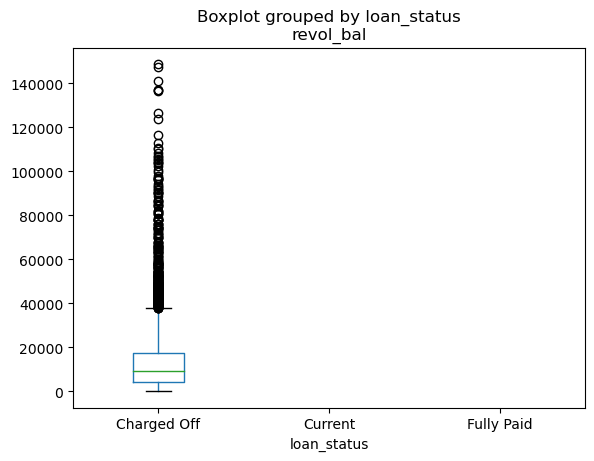

In [121]:
# Box Plot
charged_off_loans.boxplot(by ='loan_status', column =['revol_bal'], grid = False) 


In [81]:
# handling the outliers
Q1 = charged_off_loans['revol_bal'].quantile(0.25)
Q3 = charged_off_loans['revol_bal'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(lower)
print(upper)

-16357.0
37843.0


/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_86628/868002824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['revol_bal_range'] = pd.cut(x=charged_off_loans['revol_bal'], bins=range(0, 40000, 4000))


<Axes: xlabel='Rev Balance Range', ylabel='Loan Charged Off %'>

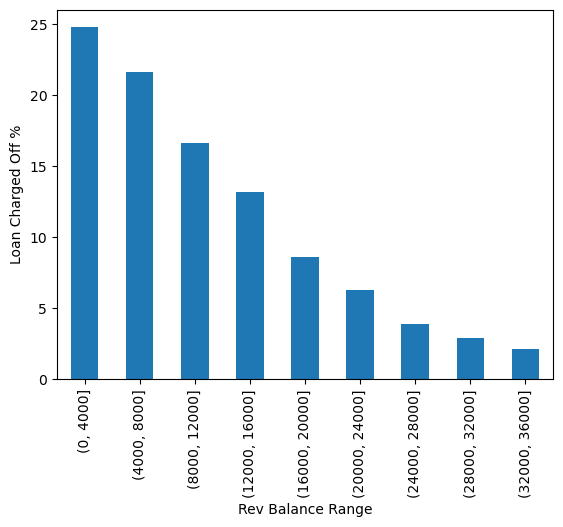

In [82]:
# Range of 0 to 40000 
#Median is  9211


charged_off_loans['revol_bal_range'] = pd.cut(x=charged_off_loans['revol_bal'], bins=range(0, 40000, 4000))

charged_off_loans[['revol_bal','revol_bal_range']]

revol_bal_range_freq = charged_off_loans['revol_bal_range'].value_counts(normalize=True)*100
revol_bal_range_freq.plot(kind='bar', xlabel='Rev Balance Range', ylabel='Loan Charged Off %')


# Inferences :
# As Revol Balance increases , Charged off percent deceases i.e Charged off is more when rev balance is low i.e 
# in range of  0-4000 and 4000-8000


In [83]:
# Total Payment

charged_off_loans['total_pymnt'].describe()

count     5627.000000
mean      6838.030941
std       6615.858854
min          0.000000
25%       2215.575000
50%       4839.000000
75%       9191.705000
max      51745.450000
Name: total_pymnt, dtype: float64

<Axes: title={'center': 'total_pymnt'}, xlabel='loan_status'>

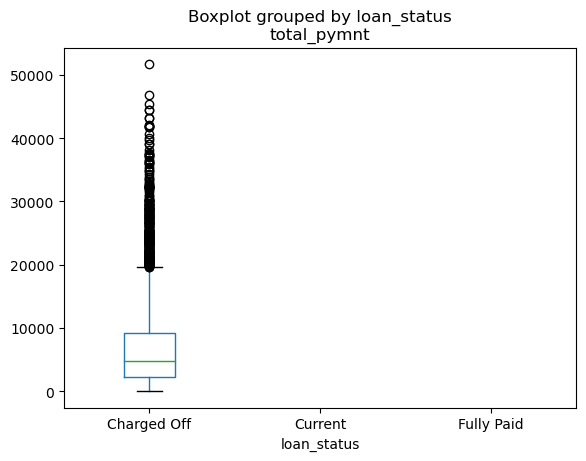

In [120]:
charged_off_loans.boxplot(by ='loan_status', column =['total_pymnt'], grid = False) 

In [84]:
# handling the outliers
Q1 = charged_off_loans['total_pymnt'].quantile(0.25)
Q3 = charged_off_loans['total_pymnt'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(lower)
print(upper)

-8248.620000000003
19655.900000000005


Text(0, 0.5, 'Charged Off')

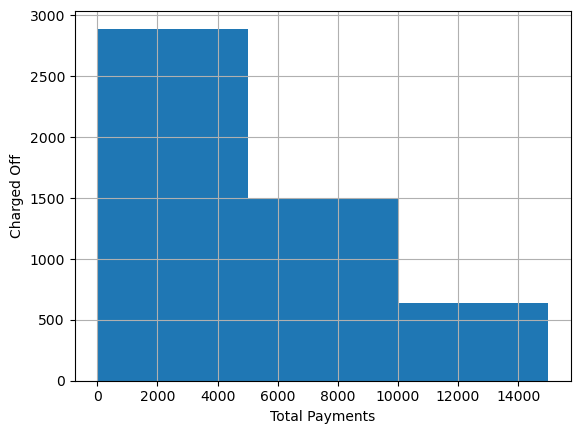

In [85]:
#Total Payments
plt = charged_off_loans['total_pymnt'].hist(bins=range(0,20000, 5000))
plt.set_xlabel("Total Payments")
plt.set_ylabel("Charged Off")

# Inferences :
# As Total Payment is increasing charged off  is decreasing . For low total payment (0-5000) charged off is more 

<Axes: xlabel='Public Record BankRuptcies', ylabel='Charged Off%'>

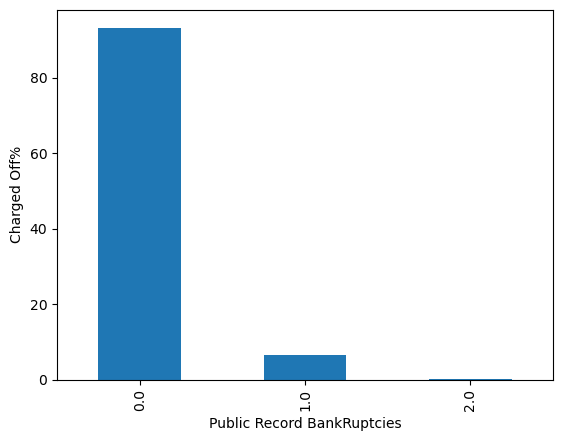

In [86]:
# Public Record Bankruptcies

pub_rec_bankruptcies_counts = charged_off_loans['pub_rec_bankruptcies'].value_counts(normalize=True)*100
pub_rec_bankruptcies_counts.plot(kind='bar', xlabel='Public Record BankRuptcies', ylabel='Charged Off%')

# Inferences :
#People who have 0 public record bankruptcies have done the most charged off

In [97]:
# Difference in Last Payment Date and Issue Date
charged_off_loans['diff_in_lastpymntandIssueD'] = charged_off_loans['last_pymnt_d'] - charged_off_loans['issue_d']


/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_86628/1981269384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['diff_in_lastpymntandIssueD'] = charged_off_loans['last_pymnt_d'] - charged_off_loans['issue_d']


In [98]:
charged_off_loans['diff_in_lastpymntandIssueD']

1       487 days
8       122 days
9       336 days
12      213 days
14      670 days
          ...   
39667   943 days
39668   943 days
39669   550 days
39678   639 days
39688   915 days
Name: diff_in_lastpymntandIssueD, Length: 5627, dtype: timedelta64[ns]

/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_86628/3990582010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['diff_in_lastpymntandIssueD_range'] = pd.cut(x=charged_off_loans['diff_in_lastpymntandIssueD'], bins=15)


<Axes: xlabel='Diff Last Payment and issue Date', ylabel='Loan Charged Off %'>

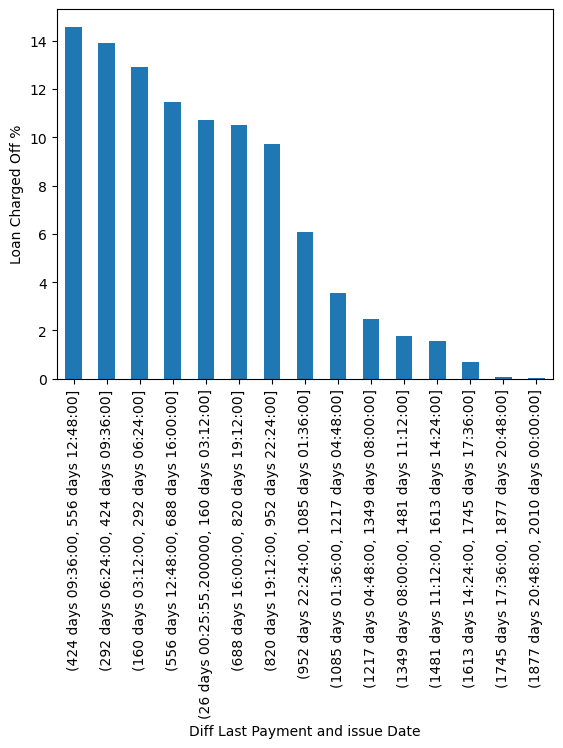

In [99]:
charged_off_loans['diff_in_lastpymntandIssueD_range'] = pd.cut(x=charged_off_loans['diff_in_lastpymntandIssueD'], bins=15)


diff_in_lastpymntandIssueDFreq = charged_off_loans['diff_in_lastpymntandIssueD_range'].value_counts(normalize=True)*100


diff_in_lastpymntandIssueDFreq.plot(kind='bar', xlabel='Diff Last Payment and issue Date', ylabel='Loan Charged Off %')


# Inferences :
# We can observe from this that As Last payment is done close to issue date then there is more chances of charged off
# Last payment date is within 2 years of issue date then there is more chances of default .




In [100]:
# mths_since_last_delinq

charged_off_loans['mths_since_last_delinq'].describe()

count    2142.000000
mean       36.157330
std        22.679331
min         0.000000
25%        17.000000
50%        34.000000
75%        53.000000
max       107.000000
Name: mths_since_last_delinq, dtype: float64

<Axes: title={'center': 'mths_since_last_delinq'}, xlabel='loan_status'>

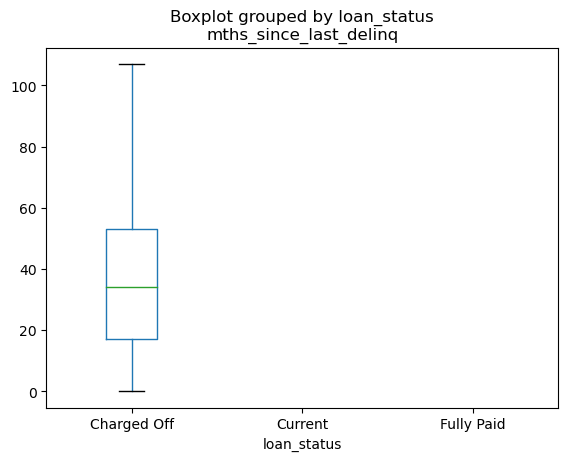

In [119]:
charged_off_loans.boxplot(by ='loan_status', column =['mths_since_last_delinq'], grid = False) 

In [118]:
# handling the outliers
Q1 = charged_off_loans['mths_since_last_delinq'].quantile(0.25)
Q3 = charged_off_loans['mths_since_last_delinq'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(lower)
print(upper)

# We can consider no outliers

-37.0
107.0


/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_86628/3460103342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['mths_since_last_delinq_range'] = pd.cut(x=charged_off_loans['mths_since_last_delinq'], bins=range(0, 100, 10))


<Axes: xlabel='Months since last delinq', ylabel='Loan Charged Off %'>

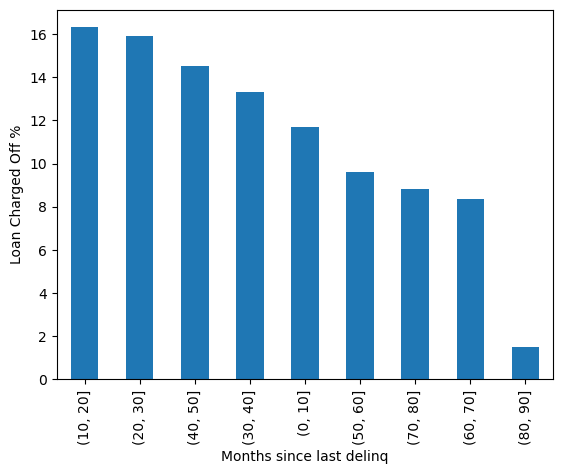

In [101]:
charged_off_loans['mths_since_last_delinq_range'] = pd.cut(x=charged_off_loans['mths_since_last_delinq'], bins=range(0, 100, 10))

mths_since_last_delinq_range_freq = charged_off_loans['mths_since_last_delinq_range'].value_counts(normalize=True)*100


mths_since_last_delinq_range_freq.plot(kind='bar', xlabel='Months since last delinq', ylabel='Loan Charged Off %')

# Inferences :

# As the number of months since the borrower's last delinquency increases the charged off percent decreases . So, If borrower's has done delinquency recently then charged off chance is more .



In [102]:
# recoveries

charged_off_loans['recoveries'].describe()

count     5627.000000
mean       672.101872
std       1720.742949
min          0.000000
25%          0.000000
50%        173.040000
75%        595.655000
max      29623.350000
Name: recoveries, dtype: float64

<Axes: title={'center': 'recoveries'}, xlabel='loan_status'>

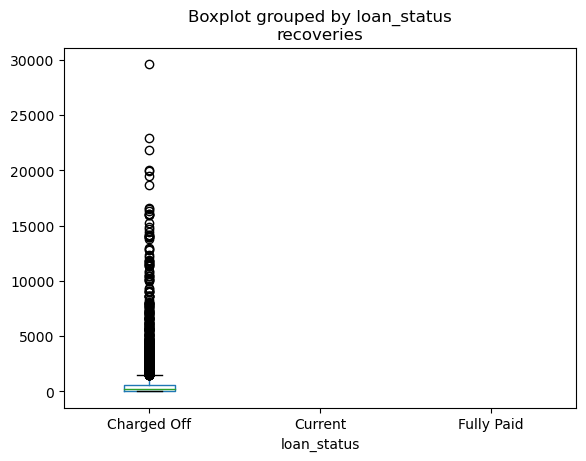

In [115]:
charged_off_loans.boxplot(by ='loan_status', column =['recoveries'], grid = False) 

In [103]:
# handling the outliers
Q1 = charged_off_loans['recoveries'].quantile(0.25)
Q3 = charged_off_loans['recoveries'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(lower)
print(upper)

-893.4825
1489.1374999999998


/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_86628/21245591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['recoveries_range'] = pd.cut(x=charged_off_loans['recoveries'], bins=range(0, 1600, 100))


<Axes: xlabel='Recoveries (Post Charge Off Gross Recovery)', ylabel='Loan Charged Off %'>

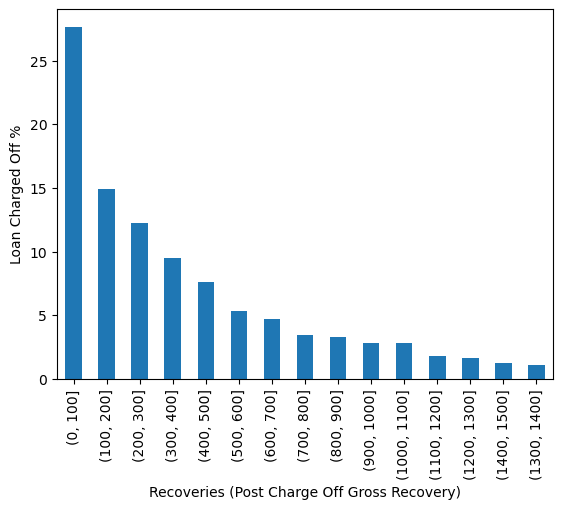

In [104]:
charged_off_loans['recoveries_range'] = pd.cut(x=charged_off_loans['recoveries'], bins=range(0, 1600, 100))

recoveries_range_freq = charged_off_loans['recoveries_range'].value_counts(normalize=True)*100


recoveries_range_freq.plot(kind='bar', xlabel='Recoveries (Post Charge Off Gross Recovery)', ylabel='Loan Charged Off %')

# Inferences :
# As recoveries decreases charged off percent decreases . Recoveries in range of (0, 100 ) has the max charged off .


/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_86628/3190702568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['last_credit_pull_d_year'] = charged_off_loans['last_credit_pull_d'].dt.year


<Axes: xlabel='last_credit_pull_date year', ylabel='Charged Off %'>

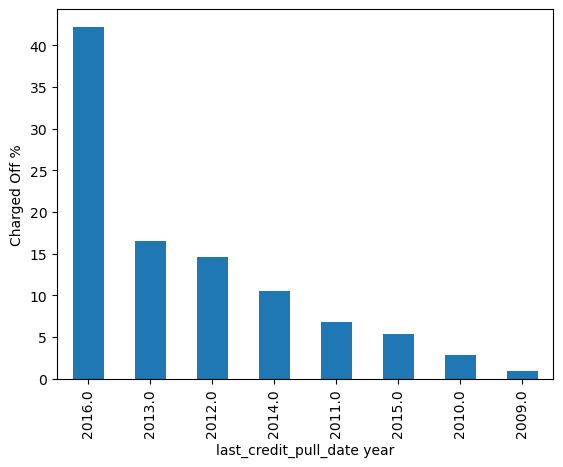

In [105]:
# Last Credit Pull Date


charged_off_loans['last_credit_pull_d_year'] = charged_off_loans['last_credit_pull_d'].dt.year

last_credit_pull_year_counts = charged_off_loans['last_credit_pull_d_year'].value_counts(normalize=True)*100
last_credit_pull_year_counts.plot(kind='bar', xlabel='last_credit_pull_date year', ylabel='Charged Off %')

# Inferences :
# In 2016 last credit pull date year charged off is maximum . Will find out patterns in month

/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_86628/1854630146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['last_credit_pull_d_month'] = charged_off_loans['last_credit_pull_d'].dt.month


<Axes: xlabel='last_credit_pull_date month', ylabel='Charged Off %'>

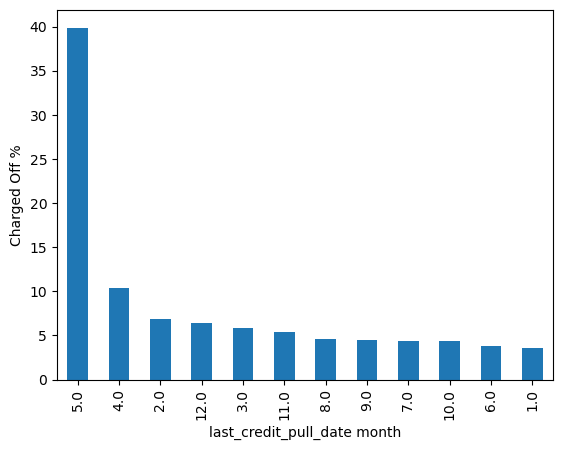

In [106]:

charged_off_loans['last_credit_pull_d_month'] = charged_off_loans['last_credit_pull_d'].dt.month

last_credit_pull_d_month_counts = charged_off_loans['last_credit_pull_d_month'].value_counts(normalize=True)*100
last_credit_pull_d_month_counts.plot(kind='bar', xlabel='last_credit_pull_date month', ylabel='Charged Off %')

# Inferences :
# In Month 5 i.e May last_credit_pull_date maximum charged off 

In [114]:
#last_pymnt_amnt


charged_off_loans['last_pymnt_amnt'].describe()





count     5627.000000
mean       326.020833
std        528.983051
min          0.000000
25%        112.885000
50%        238.250000
75%        405.705000
max      12818.380000
Name: last_pymnt_amnt, dtype: float64

<Axes: title={'center': 'last_pymnt_amnt'}, xlabel='loan_status'>

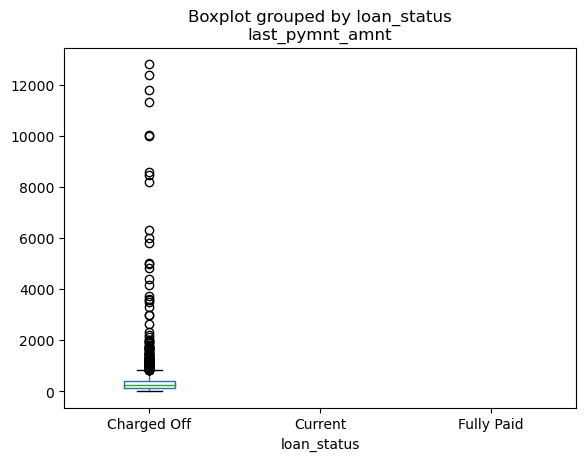

In [113]:
charged_off_loans.boxplot(by ='loan_status', column =['last_pymnt_amnt'], grid = False) 

In [109]:
# handling the outliers
Q1 = charged_off_loans['last_pymnt_amnt'].quantile(0.25)
Q3 = charged_off_loans['last_pymnt_amnt'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(lower)
print(upper)

-326.345
844.935


/var/folders/tw/slp1h_ds0hn4rfr6wp6h75gm0000gn/T/ipykernel_86628/2202530072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['last_pymnt_amnt_range'] = pd.cut(x=charged_off_loans['last_pymnt_amnt'], bins=range(0, 1000, 200))


<Axes: xlabel='Last Payment Amount', ylabel='Loan Charged Off %'>

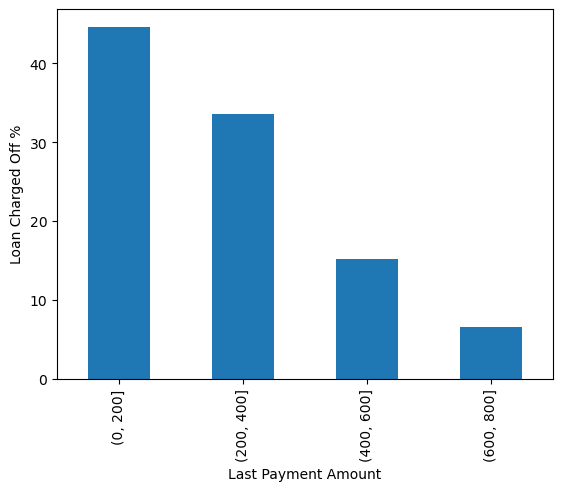

In [111]:
charged_off_loans['last_pymnt_amnt_range'] = pd.cut(x=charged_off_loans['last_pymnt_amnt'], bins=range(0, 1000, 200))

last_pymnt_amnt_range_freq = charged_off_loans['last_pymnt_amnt_range'].value_counts(normalize=True)*100


last_pymnt_amnt_range_freq.plot(kind='bar', xlabel='Last Payment Amount', ylabel='Loan Charged Off %')

# Inferences :
# As last payment amount increases charged off percent decreases .
# Last Payment Amount <200 means very high chances of charged off . <400 chances of charged off is high
